In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv("data_stocks.csv")

In [49]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

In [53]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [54]:
df1 = df.copy()

In [55]:
df1['DATE'] = pd.to_datetime(df["DATE"],unit='s')

In [56]:
# we will change the shape of the data so that our rows become the company name 
# and the columns become the stock prices on respective dates
cols = df1['DATE'].values
rows = df1.columns[1:]
data = df1.to_numpy()
# df.iloc[-1::-1]
# df1.stack()

In [57]:
df1 = pd.DataFrame(data=df1.T.iloc[1:])
df1.columns = cols
df1

,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:51:00,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00
SP500,2363.61,2364.1,2362.68,2364.31,2364.85,2365.62,2365.2,2365.29,2364.32,2364.64,...,2471.89,2472.77,2472.9,2472.64,2472.02,2472.22,2471.77,2470.03,2471.49,2471.49
NASDAQ.AAL,42.33,42.36,42.31,42.37,42.5378,42.5399,42.47,42.47,42.39,42.33,...,44.72,44.73,44.76,44.75,44.71,44.72,44.73,44.74,44.71,44.74
NASDAQ.AAPL,143.68,143.7,143.69,143.64,143.66,143.78,143.864,143.81,143.815,143.8,...,164.16,164.06,164.19,164.2,164.14,164.11,164.12,164.01,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.225,130.073,129.88,130.07,130.18,130.14,130.1,130.21,...,155.06,155.01,155.12,155.09,155.04,155.09,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.03,82,82.035,82.04,82.12,82.19,82.23,82.165,...,83.71,83.7,83.63,83.69,83.66,83.67,83.65,83.62,83.58,83.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,7.36,7.38,7.36,7.35,7.36,7.36,7.365,7.36,7.37,7.365,...,32.29,32.295,32.3,32.295,32.295,32.285,32.295,32.29,32.275,32.27
NYSE.XYL,50.22,50.22,50.12,50.16,50.2,50.2,50.33,50.3,50.25,50.22,...,62.06,62.1,62.105,62.105,62.095,62.11,62.1,62.09,62.075,62.07
NYSE.YUM,63.86,63.74,63.75,63.88,63.91,63.84,63.83,63.83,63.85,63.84,...,76.815,76.81,76.8799,76.91,76.885,76.88,76.9,76.88,76.83,76.81
NYSE.ZBH,122,121.77,121.7,121.7,121.695,121.85,122.1,122.28,121.875,121.93,...,114.36,114.31,114.35,114.32,114.3,114.31,114.33,114.31,114.23,114.28


### scaling data

In [58]:
from sklearn.preprocessing import StandardScaler 

features = df1.values 
sc = StandardScaler() 
X_scaled = sc.fit_transform(features) 
print('Shape of Scaled features : ') 
print(X_scaled.shape)

Shape of Scaled features : 
(501, 41266)


### scree plot pca variance vs number of components 

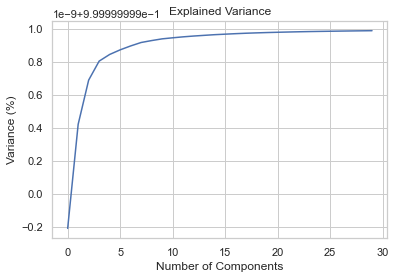

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:30]))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()
#  lets go with 25

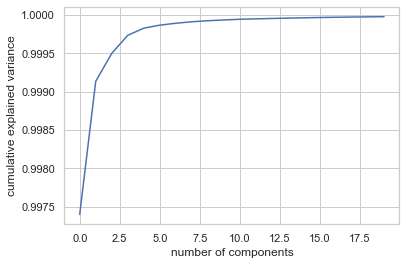

In [60]:
import seaborn as sns
sns.set() 
sns.set_style('whitegrid') 
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:20])) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance') 
plt.show()

In [61]:
my_data = df.copy()

In [62]:
pca = PCA(n_components=25) 
pca.fit(X_scaled) 
print('explained variance :') 
print('') 
print(pca.explained_variance_) 
print('') 
print('PCA Components : ') 
print('') 
print(pca.components_) 
print('') 
X_transformed = pca.transform(X_scaled) 
print('Transformed Feature values first five rows :') 
print('') 
print(X_transformed[:5,:]) 
print('') 
print('Transformed Feature shape :') 
print('') 
print(X_transformed.shape) 
print('') 
print('Original Feature shape :') 
print('') 
print(X_scaled.shape) 
print('') 
print('Restransformed Feature shape :') 
print('') 
X_retransformed = pca.inverse_transform(X_transformed) 
print(X_retransformed.shape) 
print('') 
print('Retransformed Feature values first five rows :') 
print('') 
print(X_retransformed[:25,:]) 
print('')

explained variance :

[4.12410017e+04 7.16685582e+01 1.50655992e+01 9.71023421e+00
 3.86316450e+00 1.60384851e+00 1.03871384e+00 7.97357989e-01
 5.53728414e-01 4.15453639e-01 3.72352235e-01 2.18174637e-01
 2.11642310e-01 1.85858334e-01 1.80255130e-01 1.61047152e-01
 1.31903492e-01 1.15996913e-01 9.58520361e-02 8.72376041e-02
 7.56408733e-02 6.72561676e-02 6.58409047e-02 5.16082034e-02
 4.63174640e-02]

PCA Components : 

[[ 0.00491446  0.00491475  0.00491507 ...  0.00491842  0.00491846
   0.0049184 ]
 [ 0.00806896  0.00800282  0.00793144 ... -0.00658309 -0.00656673
  -0.00658065]
 [-0.00760186 -0.00736632 -0.00715671 ... -0.0048557  -0.00490797
  -0.00481143]
 ...
 [ 0.0075972   0.00837     0.00826942 ...  0.00607808  0.00594745
   0.00589531]
 [-0.01027367 -0.01035358 -0.01026844 ...  0.01683274  0.01662096
   0.01684015]
 [-0.00799912 -0.00770345 -0.00892695 ... -0.00148232 -0.00174087
  -0.00168339]]

Transformed Feature values first five rows :

[[ 2.85155202e+03  1.68123590e+01 -2

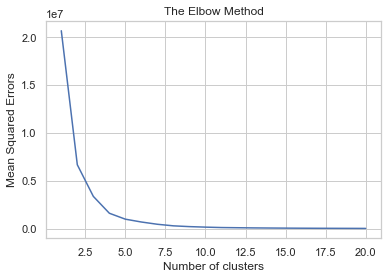

In [63]:
wcss=[] 
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X_transformed) 
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 21), wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Mean Squared Errors') 
plt.show()

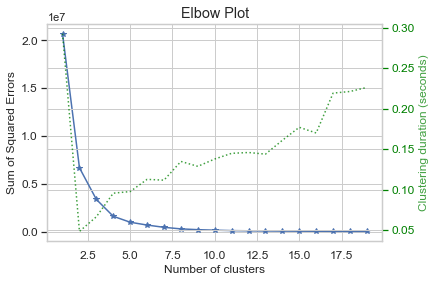

In [64]:
import scikitplot 
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20));

Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class.


KeyboardInterrupt: 

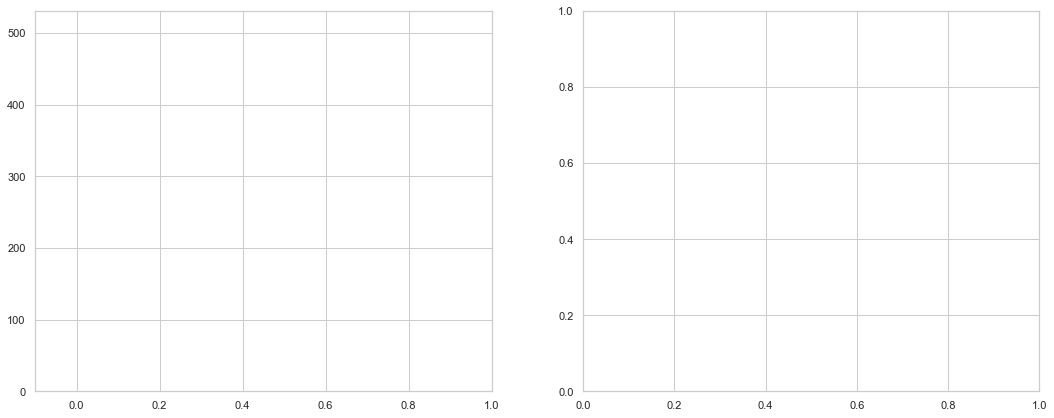

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility
X= df1

range_n_clusters = [2, 3, 9,10]
# range_n_clusters = [11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### 3 and 9 are good clusters... the other number of clusters gave negative value for silhouette_score...

In [99]:
# Optimum number of cluster from the elbow method is determined to be 5 
# Applying K-Means Clustering to find stocks which are similar in performance 
k_means = KMeans(n_clusters=9,random_state=0,init='k-means++') 
k_means.fit(X_transformed) 
y_kmeans = kmeans.fit_predict(X_transformed) 
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [1 2 8 0 4 0 0 2 0 2 2 8 3 4 5 2 5 2 4 0 4 4 5 4 2 0 8 2 2 0 4 4 2 2 4 4 0
 2 7 4 2 4 0 2 8 0 0 2 2 2 2 4 3 3 2 2 0 2 2 8 8 8 0 2 2 0 3 4 4 0 2 8 0 2
 4 2 2 4 2 2 2 4 8 2 4 0 2 2 5 4 2 4 6 2 2 4 4 7 4 4 4 4 2 4 2 0 2 2 4 4 4
 5 2 4 4 0 4 4 2 0 0 4 4 2 4 0 4 4 2 0 2 5 4 4 2 8 4 5 4 2 0 4 0 4 4 4 4 8
 0 0 2 8 0 2 2 0 4 0 2 8 4 4 4 8 7 8 2 4 2 4 5 8 2 2 2 2 7 2 4 8 2 2 0 4 2
 4 0 0 2 4 0 4 2 2 2 2 8 4 0 4 7 8 2 4 2 4 2 2 0 5 2 2 4 4 2 2 4 0 0 4 2 4
 0 4 4 0 2 4 0 4 0 4 4 4 4 0 4 4 2 4 0 4 0 4 4 4 4 4 4 4 4 5 4 4 4 0 2 4 2
 4 2 8 2 4 4 2 2 4 0 2 4 8 2 2 4 2 2 4 4 2 5 8 2 2 4 4 2 8 2 2 2 0 4 2 2 2
 2 0 2 0 5 8 4 0 4 2 4 2 0 0 2 2 2 0 2 4 2 4 2 2 0 2 4 2 2 2 2 0 2 2 2 2 8
 8 4 5 4 2 4 2 4 4 4 2 0 0 4 2 8 8 0 4 2 5 0 5 4 8 2 4 0 2 2 4 2 2 4 8 2 2
 0 2 2 2 4 2 5 2 2 0 4 2 4 2 4 2 4 4 2 0 2 4 4 2 8 2 4 4 0 0 4 4 0 2 4 0 8
 4 0 2 0 8 4 0 4 2 2 4 2 4 4 8 5 2 4 8 4 2 2 5 4 0 4 0 8 2 8 0 0 4 4 8 0 2
 0 2 2 4 5 4 4 4 4 4 8 0 4 4 4 0 2 2 2 4 2 0 8 2 0 0 0 2 0 4 0 4 4 0 4 4 2
 8 4 

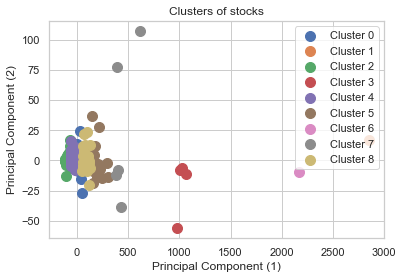

The above 5 clusters shows the stocks which are similar in stock performance


In [90]:
# Visualising the clusters 
for i in range(0,9):
    plt.scatter(X_transformed1[labels == i, 0], X_transformed[labels == i, 1], s = 100, label = 'Cluster '+str(i)) 
 
#
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of stocks') 
plt.xlabel('Principal Component (1)') 
plt.ylabel('Principal Component (2)') 
plt.legend() 
plt.show() 
print('The above 5 clusters shows the stocks which are similar in stock performance')

### Note: we haven't got 2 PCA's we've got 25... so we'll convert it to 2 pca and see the results on graph

In [81]:
pca = PCA(n_components=2) 
pca.fit(X_scaled) 
X_transformed1 = pca.transform(X_scaled) 

## 1st question
### stocks similar in performance

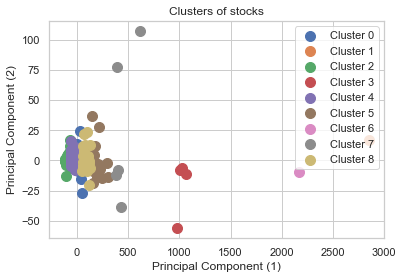

The above 9 clusters shows the stocks which are similar in stock performance


In [103]:
# Visualising the clusters 
for i in range(0,9):
    plt.scatter(X_transformed1[labels == i, 0], X_transformed1[labels == i, 1], s = 100, label = 'Cluster ' +str(i)) 

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of stocks') 
plt.xlabel('Principal Component (1)') 
plt.ylabel('Principal Component (2)') 
plt.legend() 
plt.show() 
print('The above 9 clusters shows the stocks which are similar in stock performance')

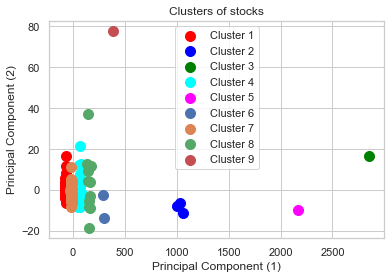

The above 5 clusters shows the stocks which are similar in stock performance


In [95]:
# Visualising the clusters 

plt.scatter(X_transformed1[y_kmeans == 0, 0], X_transformed1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X_transformed1[y_kmeans == 1, 0], X_transformed1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X_transformed1[y_kmeans == 2, 0], X_transformed1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X_transformed1[y_kmeans == 3, 0], X_transformed1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X_transformed1[y_kmeans == 4, 0], X_transformed1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_transformed1[y_kmeans == 5, 0], X_transformed1[y_kmeans == 5, 1], s = 100, label = 'Cluster 6')
plt.scatter(X_transformed1[y_kmeans == 6, 0], X_transformed1[y_kmeans == 6, 1], s = 100,  label = 'Cluster 7')
plt.scatter(X_transformed1[y_kmeans == 7, 0], X_transformed1[y_kmeans == 7, 1], s = 100,  label = 'Cluster 8')
plt.scatter(X_transformed1[y_kmeans == 8, 0], X_transformed1[y_kmeans == 8, 1], s = 100, label = 'Cluster 9')


#
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of stocks') 
plt.xlabel('Principal Component (1)') 
plt.ylabel('Principal Component (2)') 
plt.legend() 
plt.show() 
print('The above 9 clusters shows the stocks which are similar in stock performance')

In [ ]:
for i in df['labels'].unique().tolist(): 
    count = df[df['labels'] == i].shape[0] 
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i, count))

## 2nd question:
### unique patterns based on fluctuations in price

### for this we'll have to run the algorithm on the days to find unique patterns

In [127]:
df1 = df.copy() 

In [128]:
features = df.values 
sc = StandardScaler() 
X_scaled = sc.fit_transform(features) 
print('Shape of Scaled features : ') 
print(X_scaled.shape) 

Shape of Scaled features : 
(41266, 502)


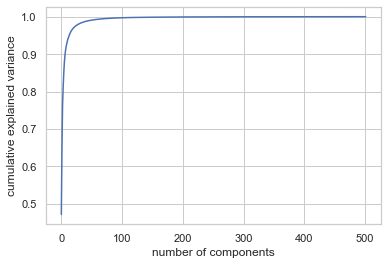

In [129]:
# Determining optimal number of components for PCA looking at the explained variance as a function of the components 
sns.set() 
sns.set_style('whitegrid') 
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance') 
plt.show()

In [130]:
# Here we see that we'd need about 100 components to retain 100% of the variance. Looki ng at this plot for a high-dimensional 
# dataset can help us understand the level of redundancy present in multiple observatio ns 
# Applying PCA to reduce the number of dimensions from 502 to 2 dimensions for better data visualization. 
pca = PCA(n_components=2) 
pca.fit(X_scaled) 
print('explained variance :') 
print('') 
print(pca.explained_variance_) 
print('') 
print('PCA Components : ') 
print('') 
print(pca.components_) 
print('') 
X_transformed = pca.transform(X_scaled) 
print('Transformed Feature values first five rows :') 
print('') 
print(X_transformed[:5,:]) 
print('') 
print('Transformed Feature shape :') 
print('') 
print(X_transformed.shape) 
print('') 
print('Original Feature shape :') 
print('') 
print(X_scaled.shape) 
print('') 
print('Restransformed Feature shape :') 
print('') 
X_retransformed = pca.inverse_transform(X_transformed) 
print(X_retransformed.shape) 
print('') 
print('Retransformed Feature values first five rows :') 
print('') 
print(X_retransformed[:5,:]) 
print('')

explained variance :

[237.01475857  86.20695296]

PCA Components : 

[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]

Transformed Feature values first five rows :

[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]

Transformed Feature shape :

(41266, 2)

Original Feature shape :

(41266, 502)

Restransformed Feature shape :

(41266, 502)

Retransformed Feature values first five rows :

[[-1.50990118 -1.74284403 -1.64577982 ... -1.7995004  -0.74770277
  -1.91476551]
 [-1.51766825 -1.74675806 -1.64229528 ... -1.80324623 -0.73824226
  -1.91303266]
 [-1.51325881 -1.74051719 -1.63476559 ... -1.79673515 -0.7330262
  -1.9048013 ]
 [-1.51755709 -1.74977311 -1.64961078 ... -1.80654313 -0.7464678
  -1.92009935]
 [-1.51344371 -1.74229018 -1.63865681 ... -1.798657   -0.73722615
  -1.90861183]]



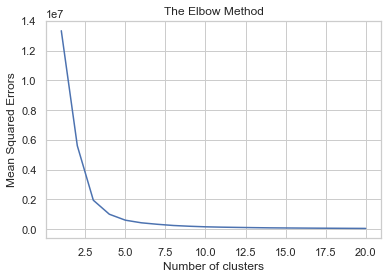

In [131]:
wcss=[] 
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X_transformed) 
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 21), wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Mean Squared Errors') 
plt.show() 

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

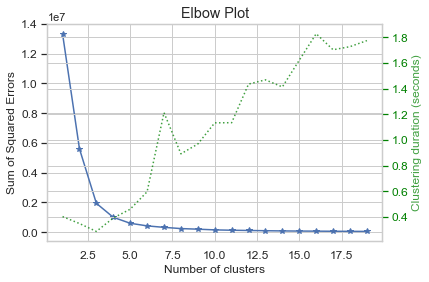

In [137]:
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility
X=X_transformed

range_n_clusters = [4,5]
# range_n_clusters = [11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class.
For n_clusters = 4 The average silhouette_score is : 0.6742229706149854


KeyboardInterrupt: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x000002A9187F3700> (for post_execute):
Traceback (most recent call last):
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\IPython\core\events.py", line 88, in trigger
    func(*args, **kwargs)
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\ipykernel\pylab\backend_inline.py", line 121, in flush_figures
    return show(True)
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\ipykernel\pylab\backend_inline.py", line 41, in show
    display(
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\IPython\core\display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "c:\users\syed rahim saqib\python_miniconda\lib\site-packages\I

### 4 and 5 are good... we'll choose 4 

In [141]:
# Optimum number of cluster from the elbow method is determined to be 5 
# Applying K-Means Clustering to find stocks which are similar in performance 

k_means = KMeans(n_clusters=4,random_state=0,init='k-means++') 
k_means.fit(X_transformed) 
y_kmeans = kmeans.fit_predict(X_transformed) 
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [3 3 3 ... 0 0 0]


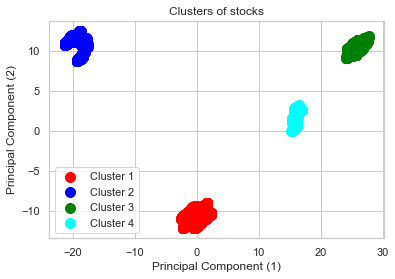

In [142]:
# Visualising the clusters 
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
# plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
#
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of stocks') 
plt.xlabel('Principal Component (1)') 
plt.ylabel('Principal Component (2)') 
plt.legend() 
plt.show() 


<AxesSubplot:>

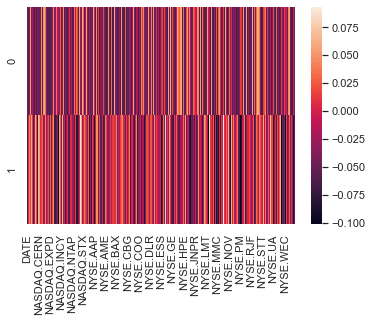

In [151]:
df_comp = pd.DataFrame(pca.components_,columns=df1.columns)
df_comp.head()
sns.set_style('whitegrid') 
sns.heatmap(df_comp)

In [152]:
# Problem 3:Identify which all stocks are moving together and which all stocks are diff erent from each other. 

df['labels'] = labels 
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3


In [153]:
df['labels'].unique().tolist()


[3, 1, 2, 0]


For lablel 3 the number of similar stock performances is : 5880 

For lablel 1 the number of similar stock performances is : 8772 

For lablel 2 the number of similar stock performances is : 16070 

For lablel 0 the number of similar stock performances is : 10544 


In [155]:
 # Fitting Hierarchical Clustering to the dataset 
from sklearn.cluster import SpectralClustering 
    
hc = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors') 
hc.fit(X_transformed)
hc.fit_predict(X_transformed)

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, ..., 3, 3, 3])

In [156]:
 y_labels = hc.labels_ 

In [157]:
len(y_labels)
np.unique(y_labels)

array([0, 1, 2, 3, 4])

In [158]:
SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans', coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None, n_clusters=5, n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

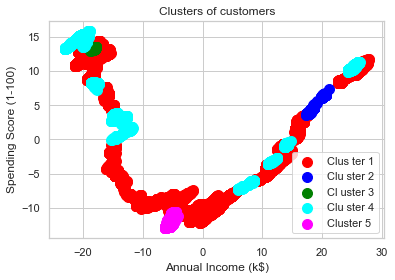

In [161]:
# Visualising the clusters 
X = X_transformed 
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Clus ter 1') 
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Clu ster 2') 
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cl uster 3') 
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Clu ster 4') 
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
plt.title('Clusters of customers') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 
plt.show()

In [58]:
df1.columns 

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

## 3rd question:
### which stocks move together and which dont?
### Ans: we can restate this to first question which was " which stocks where similar in performance..." because we clustered them based on their principal components...
### ( there each row was data about one stock and the columns were day's..)